### Clustering, PCA, and SVD using Term-Document Matrix

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as la

from numpy import *
from sklearn import decomposition
from sklearn.cluster import KMeans

pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision = 2, suppress = True, edgeitems = 5, linewidth = 120)

In [2]:
Data = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/term-doc-mat.csv", header = None)
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,database,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,index,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,likelihood,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,linear,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,matrix,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,query,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,regression,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,retrieval,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,sql,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,vector,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [3]:
# Remove the column containing the terms
TD = Data.iloc[:, 1:]
TD

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [4]:
# Reindex the columns to start from 0
TD.columns = range(15)
TD

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [5]:
# Extract the first column
terms = Data.iloc[:, 0]
terms

0      database
1         index
2    likelihood
3        linear
4        matrix
5         query
6    regression
7     retrieval
8           sql
9        vector
Name: 0, dtype: object

In [6]:
# Transpose the DataFrame
DT = TD.T
DT

,0,1,2,3,4,5,6,7,8,9
0,24,9,0,3,1,12,0,1,21,2
1,32,5,3,0,0,2,0,0,10,0
2,12,5,0,0,0,0,0,0,16,0
3,6,2,0,0,0,0,0,0,7,2
4,43,20,3,0,0,27,0,2,31,0
5,2,0,7,16,33,0,18,0,0,27
6,0,1,12,0,2,0,32,0,0,4
7,3,0,4,2,0,0,22,0,0,2
8,1,0,27,25,7,0,34,3,0,11
9,6,0,4,23,12,22,17,9,0,8


In [7]:
# Get the number of terms and documents
numTerms = TD.shape[0]
NDocs = TD.shape[1]

In [8]:
# Calculate the document frequency for each term
DF = pd.DataFrame([(TD != 0).sum(1)]).T
DF

,0
0,10
1,11
2,8
3,10
4,9
5,8
6,5
7,9
8,6
9,12


In [9]:
# Create a matrix of the same shape
NMatrix = np.ones(np.shape(TD), dtype = float) * NDocs
print(NMatrix)

[[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]]


In [10]:
# Convert each entry into IDF values
IDF = np.log2(np.divide(NMatrix, np.array(DF)))
print(IDF)

[[0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32]
 [0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32]]


In [11]:
# Compute the TFxIDF values for each document-term entry
TD_tfidf = TD * IDF
TD_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,14.04,18.72,7.02,3.51,25.15,1.17,0.00,1.75,0.58,3.51,2.34,0.00,0.00,0.00,0.00
1,4.03,2.24,2.24,0.89,8.95,0.00,0.45,0.00,0.00,0.00,12.08,6.26,1.34,0.89,4.92
2,0.00,2.72,0.00,0.00,2.72,6.35,10.88,3.63,24.49,3.63,0.00,0.91,0.00,0.00,0.00
3,1.75,0.00,0.00,0.00,0.00,9.36,0.00,1.17,14.62,13.45,4.09,7.02,12.28,1.75,1.17
4,0.74,0.00,0.00,0.00,0.00,24.32,1.47,0.00,5.16,8.84,10.32,3.68,8.84,2.95,0.00
5,10.88,1.81,0.00,0.00,24.49,0.00,0.00,0.00,0.00,19.95,8.16,3.63,0.00,4.53,2.72
6,0.00,0.00,0.00,0.00,0.00,28.53,50.72,34.87,53.89,26.94,0.00,0.00,0.00,0.00,0.00
7,0.74,0.00,0.00,0.00,1.47,0.00,0.00,0.00,2.21,6.63,19.90,5.16,3.68,2.95,2.95
8,27.76,13.22,21.15,9.25,40.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.00
9,0.64,0.00,0.00,0.64,0.00,8.69,1.29,0.64,3.54,2.58,10.62,5.15,4.51,2.25,0.97


---

kMeans module of the MLA book

In [12]:
def distEuclid(vecA, vecB):

    return sqrt(sum(power(vecA - vecB, 2)))

In [13]:
def distCosine(vecA, vecB):

    A_norm = np.linalg.norm(vecA)
    B_norm = np.linalg.norm(vecB)
    sims = np.dot(vecA,vecB)/(A_norm * B_norm)
    dists = 1 - sims
 
    return dists

In [14]:
def randCent(dataSet, k):

	n = shape(dataSet)[1]
	centroids = zeros((k, n), dtype = float)
	
	for j in range(n):
		minJ = min(dataSet[:, j])
		rangeJ = float(max(dataSet[:, j]) - minJ)
		centroids[:, j] = minJ + rangeJ * random.rand(k)

	return centroids 

In [15]:
def kMeans(dataSet, k, distMeas = distEuclid, createCent = randCent):

    m = shape(dataSet)[0]
    clusterAssment = zeros((m, 2))
    centroids = createCent(dataSet, k)
    clusterChanged = True

    while clusterChanged:
        clusterChanged = False

        for i in range(m):
            minDist = inf
            minIndex = -1
            
            for j in range(k):
                distJI = distMeas(centroids[j, :], dataSet[i, :])

                if distJI < minDist:
                    minDist = distJI
                    minIndex = j

            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            
            clusterAssment[i, :] = minIndex, minDist ** 2

        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssment[:, 0] == cent)[0]]

            if(len(ptsInClust) != 0):
                centroids[cent, :] = mean(ptsInClust, axis = 0)
                
    return centroids, clusterAssment

---

Clustering

In [16]:
DT_tfidf = TD_tfidf.T # Transpose the TF-IDF term-document matrix
DT_tfidf = np.array(DT_tfidf) # Convert to a NumPy array

# Using K-means with TF-IDF data
centroids_tfidf, clusters_tfidf = kMeans(DT_tfidf, 3, distCosine, randCent)

In [17]:
# Create a DataFrame for the centroids
centroids = pd.DataFrame(centroids_tfidf, columns = terms)
centroids

,database,index,likelihood,linear,matrix,query,regression,retrieval,sql,vector
0,13.69,3.67,1.09,0.35,0.15,7.44,0.00,0.44,22.47,0.26
1,0.97,4.25,0.76,6.63,5.77,6.50,4.49,6.88,0.22,4.35
2,0.88,0.11,11.34,6.29,7.74,0.00,42.00,0.55,0.00,3.54


In [18]:
# Check the cluster assigmens for each document
print(clusters_tfidf)

[[0.   0.  ]
 [0.   0.01]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [2.   0.02]
 [2.   0.  ]
 [2.   0.  ]
 [2.   0.  ]
 [1.   0.04]
 [1.   0.02]
 [1.   0.01]
 [1.   0.06]
 [1.   0.01]
 [1.   0.08]]


In [19]:
# Create a DataFrame for the document clusters
doc_clusters = pd.DataFrame(clusters_tfidf, columns = ["Cluster", "MinDistance ** 2"])
doc_clusters

,Cluster,MinDistance ** 2
0,0.00,0.00
1,0.00,0.01
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,2.00,0.02
6,2.00,0.00
7,2.00,0.00
8,2.00,0.00
9,1.00,0.04


In [20]:
# Extracting and converting the first column to integers
cluster_array = clusters_tfidf[:, 0].astype(int)
print(cluster_array)

[0 0 0 0 0 2 2 2 2 1 1 1 1 1 1]


In [21]:
def cluster_sizes(data, cluster_array):
    
    size = {} # Initialize an empty dictionary
    cluster_labels = np.unique(cluster_array) # Get unique cluster labels
    n_clusters = cluster_labels.shape[0] # Determine the number of unique clusters

    # Count the number of data points assigned to the current cluster
    for c in cluster_labels:
        size[c] = len(data[cluster_array == c])

    return size

In [22]:
c_size = cluster_sizes(DT_tfidf, cluster_array)

for c in c_size.keys():
    print("Size of Cluster", c, "=", c_size[c])

Size of Cluster 0 = 5
Size of Cluster 1 = 6
Size of Cluster 2 = 4


---

Principal Component Analysis

In [23]:
pca = decomposition.PCA() # Create a PCA object
DTtrans = pca.fit(DT).transform(DT) # Fit PCA

In [24]:
DTtrans.shape

(15, 10)

In [25]:
print(DTtrans)

[[ 25.45  -1.8    4.02   3.12   0.24   0.03  -3.15  -1.97  -0.83  -0.77]
 [ 23.78  -7.29  -0.53   4.77  -6.32   5.03  10.7    0.54   0.39   0.13]
 [ 15.03  -5.44 -10.09   3.46  -2.87   1.96  -4.65  -3.52  -0.43   1.42]
 [  6.75  -4.39 -14.84   3.08  -0.44  -0.13  -1.08  -1.1    1.72  -0.63]
 [ 46.7    0.01  21.78  -3.11   0.29  -1.61  -2.95   2.25   0.06  -0.07]
 [-27.41   7.93  12.27  15.16 -13.47  -5.75  -1.55   1.7    0.37   0.27]
 [-15.67 -21.74  -1.33 -11.4   -5.81  -5.58  -0.61   0.2   -0.47  -0.03]
 [ -8.28 -16.54  -6.94  -5.39  -1.47  -4.77   2.29  -0.76  -3.19  -0.68]
 [-29.51 -18.64  16.68  -4.82   1.69  11.97  -1.7   -0.19   1.76   0.06]
 [-11.41   0.44  15.03   3.03  17.19  -7.41   3.29  -1.25   0.1    0.54]
 [ -6.98  37.69   4.5  -14.83  -5.5    0.36   1.92  -2.62   0.36   0.31]
 [ -5.97  13.91  -6.64  -2.12   3.32   4.19  -1.79   3.47  -1.93  -1.89]
 [-12.36  10.4   -4.93  11.5    5.51   5.49   0.09  -0.93  -2.48   0.25]
 [ -1.67   2.69 -13.18   2.04   3.72  -3.59  -0.03 

In [26]:
# Printing explained variance ratio
varPercentage = pca.explained_variance_ratio_ * 100
print(varPercentage)

[45.18 22.68 15.35  6.55  5.03  2.86  1.4   0.5   0.34  0.11]


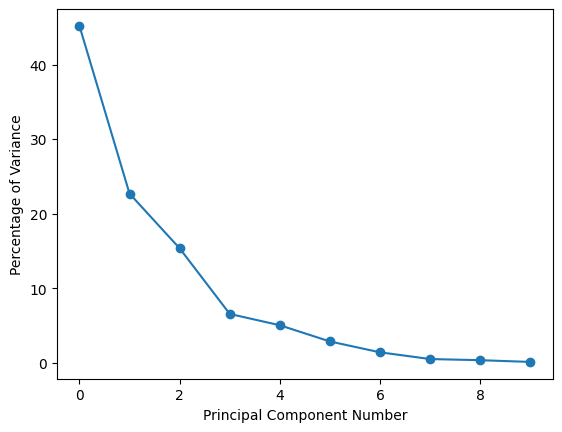

In [27]:
# Plot the explained variance ratio
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(10), varPercentage[:], marker = 'o')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [28]:
# Reduce the transformed data to the first 3 principal components
DTtrans_reduced = DTtrans[:, :3]
print(DTtrans_reduced)

[[ 25.45  -1.8    4.02]
 [ 23.78  -7.29  -0.53]
 [ 15.03  -5.44 -10.09]
 [  6.75  -4.39 -14.84]
 [ 46.7    0.01  21.78]
 [-27.41   7.93  12.27]
 [-15.67 -21.74  -1.33]
 [ -8.28 -16.54  -6.94]
 [-29.51 -18.64  16.68]
 [-11.41   0.44  15.03]
 [ -6.98  37.69   4.5 ]
 [ -5.97  13.91  -6.64]
 [-12.36  10.4   -4.93]
 [ -1.67   2.69 -13.18]
 [  1.53   2.79 -15.8 ]]


In [29]:
# Using K-means with PCA-reduced data
centroids_pca, clusters_pca = kMeans(DTtrans_reduced, 3, distCosine, randCent)

In [30]:
print(clusters_pca)

[[2.   0.  ]
 [2.   0.  ]
 [1.   0.06]
 [1.   0.  ]
 [2.   0.  ]
 [0.   0.  ]
 [0.   0.47]
 [1.   0.24]
 [0.   0.08]
 [0.   0.04]
 [0.   0.3 ]
 [0.   0.33]
 [0.   0.07]
 [1.   0.04]
 [1.   0.02]]


In [31]:
meanVals = np.mean(DT, axis = 0) # Calculate mean values for each feature
meanRemoved = DT - meanVals # Remove the mean
covMat = np.cov(meanRemoved, rowvar = 0) # Calculate the covariance matrix

print(covMat)

[[179.7   38.44 -17.06 -50.7  -40.93  66.87 -60.9  -19.62 116.32 -59.49]
 [ 38.44  67.26 -21.54 -19.81  -6.5   31.83 -55.7   38.13  27.67  27.04]
 [-17.06 -21.54  51.78  31.1    9.36 -11.61  77.41  -8.72 -16.2    4.67]
 [-50.7  -19.81  31.1   85.97  51.43   2.54  45.59  15.13 -41.97  47.47]
 [-40.93  -6.5    9.36  51.43  80.57  -4.43  25.86  17.64 -35.07  74.14]
 [ 66.87  31.83 -11.61   2.54  -4.43  72.97 -22.49  15.7   45.17  -8.39]
 [-60.9  -55.7   77.41  45.59  25.86 -22.49 162.03 -18.1  -50.37   7.87]
 [-19.62  38.13  -8.72  15.13  17.64  15.7  -18.1   48.12 -19.18  49.06]
 [116.32  27.67 -16.2  -41.97 -35.07  45.17 -50.37 -19.18  93.92 -48.33]
 [-59.49  27.04   4.67  47.47  74.14  -8.39   7.87  49.06 -48.33 102.26]]


In [32]:
# Calculate eigenvalues and eigenvectors of the covariance matrix
eigVals, eigVects = la.eig(np.mat(covMat))

print("Eigenvalues: ")
print(eigVals)
print()
print("Eigenvectors: ")
print(eigVects)

Eigenvalues: 
[426.77 214.24 144.96  61.87  47.51  26.97  13.24   1.06   3.25   4.71]

Eigenvectors: 
[[-0.57 -0.09  0.46 -0.14 -0.26 -0.15  0.58  0.05 -0.1  -0.02]
 [-0.18  0.39  0.1   0.51 -0.12 -0.19 -0.22 -0.3  -0.35 -0.49]
 [ 0.18 -0.26  0.3   0.19 -0.11 -0.48 -0.11 -0.06  0.69 -0.2 ]
 [ 0.29  0.1   0.36 -0.35  0.53 -0.49 -0.02 -0.03 -0.36  0.03]
 [ 0.26  0.27  0.31 -0.47 -0.33  0.34 -0.05 -0.53  0.14 -0.11]
 [-0.21  0.13  0.43  0.13  0.56  0.51 -0.09  0.2   0.27 -0.21]
 [ 0.4  -0.51  0.42  0.37 -0.17  0.28  0.01 -0.01 -0.38  0.12]
 [ 0.06  0.38  0.08  0.41  0.14 -0.05  0.28 -0.33  0.17  0.66]
 [-0.42 -0.08  0.23 -0.11 -0.14 -0.07 -0.72 -0.01 -0.05  0.46]
 [ 0.28  0.51  0.21  0.03 -0.37 -0.04 -0.04  0.69  0.01  0.07]]


In [33]:
eigValInd = np.argsort(eigVals) # Get indices that would sort the eigenvalues
eigValInd = eigValInd[::-1] # Reverse the sorted indices for descending order
sortedEigVals = eigVals[eigValInd] # Create a sorted array of eigenvalues
print(sortedEigVals)

[426.77 214.24 144.96  61.87  47.51  26.97  13.24   4.71   3.25   1.06]


In [34]:
total = sum(sortedEigVals) # Calculate the total variance explained by all eigenvalues
varPercentage = sortedEigVals / total * 100 # Calculate the percentage of variance explained by each principal component
print(varPercentage)

[45.18 22.68 15.35  6.55  5.03  2.86  1.4   0.5   0.34  0.11]


In [35]:
topNfeat = 5 # Specify the number of top features
topEigValInd = eigValInd[:topNfeat] # Cut off unwanted dimensions
reducedEigVects = eigVects[:, topEigValInd] # Reorganize eigenvectors corresponding to the selected top eigenvalues
reducedDT = np.dot(meanRemoved, reducedEigVects) # Transform the mean-centered data into the new feature space
print(reducedDT)

[[-25.45  -1.8    4.02  -3.12   0.24]
 [-23.78  -7.29  -0.53  -4.77  -6.32]
 [-15.03  -5.44 -10.09  -3.46  -2.87]
 [ -6.75  -4.39 -14.84  -3.08  -0.44]
 [-46.7    0.01  21.78   3.11   0.29]
 [ 27.41   7.93  12.27 -15.16 -13.47]
 [ 15.67 -21.74  -1.33  11.4   -5.81]
 [  8.28 -16.54  -6.94   5.39  -1.47]
 [ 29.51 -18.64  16.68   4.82   1.69]
 [ 11.41   0.44  15.03  -3.03  17.19]
 [  6.98  37.69   4.5   14.83  -5.5 ]
 [  5.97  13.91  -6.64   2.12   3.32]
 [ 12.36  10.4   -4.93 -11.5    5.51]
 [  1.67   2.69 -13.18  -2.04   3.72]
 [ -1.53   2.79 -15.8    4.49   3.94]]


---

Singular Value Decomposition

In [36]:
# Perform Singular Value Decomposition
u, s, vt = np.linalg.svd(TD, full_matrices = False)

In [37]:
print(u)

[[ 0.39  0.6  -0.22  0.17  0.22 -0.1  -0.59  0.07 -0.07  0.04]
 [ 0.3   0.2   0.33 -0.5   0.06 -0.17  0.21 -0.08 -0.57 -0.31]
 [ 0.2  -0.16 -0.33 -0.16  0.04 -0.4   0.   -0.76  0.23 -0.02]
 [ 0.37 -0.27 -0.    0.42 -0.49 -0.53  0.04  0.27 -0.16 -0.05]
 [ 0.32 -0.23  0.19  0.49  0.31  0.38  0.03 -0.22  0.   -0.52]
 [ 0.29  0.23  0.02  0.   -0.66  0.53  0.07 -0.31 -0.03  0.22]
 [ 0.36 -0.38 -0.62 -0.35  0.08  0.3   0.02  0.34 -0.1  -0.03]
 [ 0.21 -0.05  0.34 -0.38 -0.2  -0.02 -0.28  0.21  0.65 -0.33]
 [ 0.23  0.44 -0.15  0.11  0.15 -0.09  0.72  0.18  0.38 -0.02]
 [ 0.42 -0.25  0.42 -0.03  0.33  0.    0.02  0.01  0.07  0.68]]


In [38]:
print(s)

[93.97 77.25 54.14 29.74 26.27 19.76 13.75  9.41  7.88  3.88]


In [39]:
print(np.diag(s))

[[93.97  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   77.25  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   54.14  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   29.74  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   26.27  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   19.76  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   13.75  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    9.41  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    7.88  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    3.88]]


In [40]:
print(vt)

[[ 0.24  0.18  0.1   0.06  0.41  0.39  0.18  0.12  0.37  0.35  0.41  0.21  0.21  0.09  0.07]
 [ 0.34  0.32  0.2   0.08  0.63 -0.33 -0.2  -0.11 -0.36 -0.13 -0.06 -0.07 -0.15 -0.02  0.02]
 [-0.07 -0.14 -0.06 -0.02 -0.13  0.06 -0.4  -0.27 -0.43 -0.08  0.62  0.26  0.2   0.1   0.12]
 [ 0.1   0.11  0.04  0.02 -0.03  0.5  -0.43 -0.24 -0.12  0.21 -0.49 -0.1   0.36  0.02 -0.21]
 [ 0.01  0.29  0.2   0.12 -0.1   0.52  0.2   0.09 -0.11 -0.69  0.11 -0.08 -0.1  -0.07 -0.08]
 [-0.03 -0.25 -0.17 -0.08  0.14  0.34  0.28  0.19 -0.56  0.35  0.05 -0.26 -0.36  0.11 -0.07]
 [ 0.25 -0.77  0.39  0.14  0.16  0.09  0.07 -0.09  0.05 -0.21 -0.18  0.16  0.05  0.05  0.11]
 [ 0.2   0.09  0.36  0.17 -0.33 -0.21  0.12  0.54 -0.34  0.17 -0.    0.06  0.41 -0.08 -0.04]
 [ 0.14 -0.07  0.3   0.16 -0.18 -0.13 -0.08 -0.21  0.2   0.11  0.34 -0.53 -0.11  0.21 -0.5 ]
 [ 0.18 -0.01 -0.36  0.22  0.   -0.07  0.01  0.15 -0.01 -0.13 -0.1   0.48 -0.09  0.43 -0.56]]


In [41]:
# Reconstruct the original matrix from SVD components
originalTD = np.dot(u, np.dot(np.diag(s), vt))
print(originalTD)

[[24. 32. 12.  6. 43.  2. -0.  3.  1.  6.  4.  0.  0.  0.  0.]
 [ 9.  5.  5.  2. 20. -0.  1.  0.  0.  0. 27. 14.  3.  2. 11.]
 [-0.  3. -0.  0.  3.  7. 12.  4. 27.  4.  0.  1.  0.  0.  0.]
 [ 3.  0.  0.  0.  0. 16.  0.  2. 25. 23.  7. 12. 21.  3.  2.]
 [ 1.  0.  0. -0.  0. 33.  2. -0.  7. 12. 14.  5. 12.  4. -0.]
 [12.  2.  0.  0. 27.  0.  0.  0.  0. 22.  9.  4.  0.  5.  3.]
 [-0.  0. -0. -0. -0. 18. 32. 22. 34. 17.  0.  0.  0.  0.  0.]
 [ 1.  0. -0. -0.  2. -0.  0.  0.  3.  9. 27.  7.  5.  4.  4.]
 [21. 10. 16.  7. 31.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 2.  0. -0.  2.  0. 27.  4.  2. 11.  8. 33. 16. 14.  7.  3.]]


In [42]:
numDimensions = 5 # Set the number of dimensions
u_ld = u[:, :numDimensions] # Select the first 'numDimensions' columns from the left singular vectors matrix 'u'
sigma = np.diag(s)[:numDimensions, :numDimensions] # Create a diagonal matrix using the first 'numDimensions' singular values from 's'
vt_ld = vt[:numDimensions, :] # Select the first 'numDimensions' rows from the right singular vectors matrix 'vt'
lowRankTD = np.dot(u_ld, np.dot(sigma, vt_ld)) # Reconstruct the low-rank approximation of the original term-document matrix
print(lowRankTD)

[[25.91 25.11 14.86  6.93 44.73  3.48  1.01  2.13  0.69  4.94  2.85  0.38 -0.63  0.73  0.62]
 [ 9.22  6.11  4.51  2.45 18.97  0.06  1.45  0.53 -1.38  2.21 29.08 10.89  1.35  3.63  7.49]
 [ 0.99  1.84  0.64  0.32  2.08  8.42 15.21  9.78 19.71  7.73 -0.26  0.38  0.31 -0.09 -0.01]
 [ 2.32 -2.5  -2.57 -1.04  2.02 19.88  2.46  2.41 20.22 26.42  8.01  8.45 16.08  4.63  0.57]
 [ 1.9   2.32  1.17  1.31 -1.84 29.78  0.14  0.04 10.51  9.52 13.5   8.03 15.36  3.88 -0.72]
 [12.5   5.61  2.84  1.01 24.31 -4.27 -2.65 -0.44  4.86 19.22  8.83  6.22  4.92  3.3   3.86]
 [-0.42  1.36 -0.05  0.04  0.01 16.48 29.87 19.04 38.6  14.52  0.02  0.98  0.73 -0.18  0.08]
 [ 1.06 -2.95 -1.3  -0.36  4.27  1.52  0.63 -0.07  2.55  7.29 24.47 10.72  4.68  3.87  6.32]
 [17.72 17.28 10.27  4.75 30.74  0.44 -0.23  0.88 -1.45  1.98  0.79 -0.45 -1.42  0.19  0.3 ]
 [ 1.35  0.31  0.67  1.3   0.05 27.22  3.96  1.69 10.97  8.32 33.13 14.98 14.28  5.74  4.72]]


In [43]:
queryVector = np.array([0, 0, 1, 5, 4, 0, 6, 0, 0, 2]) # Define a query vector
lowDimQuery = np.dot(la.inv(sigma), np.dot(u_ld.T, queryVector)) # Project the query vector into the low-dimensional space
print(lowDimQuery)

[ 0.07 -0.07 -0.05  0.06 -0.  ]


In [44]:
# Normalize each document vector in vt_ld
docNorm = np.array([vt_ld[:, i] / la.norm(vt_ld[:, i]) for i in range(len(vt_ld[0]))])		
print(docNorm)

[[ 0.55  0.78 -0.16  0.23  0.03]
 [ 0.37  0.63 -0.29  0.23  0.58]
 [ 0.34  0.63 -0.2   0.13  0.66]
 [ 0.36  0.53 -0.1   0.14  0.75]
 [ 0.53  0.82 -0.17 -0.04 -0.14]
 [ 0.44 -0.37  0.07  0.57  0.58]
 [ 0.26 -0.29 -0.59 -0.64  0.29]
 [ 0.3  -0.26 -0.68 -0.58  0.22]
 [ 0.53 -0.52 -0.63 -0.18 -0.15]
 [ 0.43 -0.15 -0.09  0.26 -0.85]
 [ 0.46 -0.07  0.69 -0.54  0.13]
 [ 0.57 -0.18  0.72 -0.27 -0.22]
 [ 0.42 -0.3   0.4   0.73 -0.21]
 [ 0.58 -0.14  0.67  0.12 -0.42]
 [ 0.28  0.07  0.44 -0.8  -0.3 ]]


In [45]:
qNorm = lowDimQuery / la.norm(lowDimQuery) # Normalize the low-dimensional query vector
sims = np.dot(qNorm, docNorm.T) # Compute cosine similarities

In [46]:
simInds = sims.argsort()[::-1]

for i in simInds:
    print("Cosine similarity between Document %d and the query is %.4f" %(i, sims[i]))

Cosine similarity between Document 8 and the query is 0.7387
Cosine similarity between Document 5 and the query is 0.6982
Cosine similarity between Document 12 and the query is 0.6029
Cosine similarity between Document 9 and the query is 0.4879
Cosine similarity between Document 7 and the query is 0.2872
Cosine similarity between Document 6 and the query is 0.2263
Cosine similarity between Document 13 and the query is 0.2059
Cosine similarity between Document 1 and the query is 0.0709
Cosine similarity between Document 0 and the query is 0.0431
Cosine similarity between Document 11 and the query is 0.0136
Cosine similarity between Document 3 and the query is 0.0077
Cosine similarity between Document 2 and the query is -0.0286
Cosine similarity between Document 4 and the query is -0.1145
Cosine similarity between Document 10 and the query is -0.2332
Cosine similarity between Document 14 and the query is -0.4372


In [47]:
# Use kMeans with SVD-transformed data
centroids_svd, clusters_svd = kMeans(vt_ld.T, 3, distCosine, randCent)

In [48]:
print(clusters_svd)

[[2.   0.  ]
 [2.   0.01]
 [2.   0.01]
 [2.   0.03]
 [2.   0.01]
 [0.   0.  ]
 [1.   0.17]
 [1.   0.17]
 [1.   0.08]
 [1.   0.31]
 [1.   0.17]
 [1.   0.12]
 [0.   0.03]
 [1.   0.26]
 [1.   0.11]]
